In [6]:
import numpy as np
import pandas as pd
from utils import *

In [22]:
    
labels_fea = {
    'lt':'Liabilities',
    'emp':'Empolyees',
    'at':'Assets',
    'ni':'Net Incomes',
    'ni-nega':'Net Incomes (Neg)',
    'cost':'Cost of Sales',
    'revt':'Revenues',
    'dvt':'Dividands',
    're':'Return Earning'
    
}
def calculate_ci_range(b,c,cov,ci=0.95):
    pp = (1. + ci) / 2.
    nstd = stats.norm.ppf(pp)
    perr = np.sqrt(np.diag(cov))
    popt = b
    
    b_up = popt + nstd * perr[0]
    b_dw = popt - nstd * perr[0]
    
    popt = c
    c_up = popt + nstd * perr[1]
    c_dw = popt - nstd * perr[1]
    
    return b_up,b_dw,c_up,c_dw

def scaling_law(xfea, fea, data_df, is_bin=False,fontsize=14):

    posi = data_df[data_df[f'inf_{fea}'] > 0]
    posi = posi[posi[f'inf_{xfea}'] > 0]

    
    if is_bin:
        min_cut_size = 8
        max_cut_size = 13
        
        xbin,ybin,ybin_var = loglogbind(posi[f'inf_{xfea}'].values, posi[f'inf_{fea}'].values)
        
        (b,c),cov =  optimize.curve_fit(f_1, xbin[np.where((xbin>=min_cut_size)&(xbin<=max_cut_size))],ybin[np.where((xbin>=min_cut_size)&(xbin<=max_cut_size))])
        plt.scatter(pow(10,xbin),pow(10,ybin),s=30,color='none',edgecolor='k')
        xx = np.linspace(min(xbin), max(xbin))
        b_up,b_dw,c_up,c_dw = calculate_ci_range(b,c,cov)
        yy = xx * b + c
        plt.plot(pow(10,xx), pow(10,yy),color='k',label=f'slope={b:.2f}')

        
    else:
        (b,c),cov =  optimize.curve_fit(f_1, getLog(posi[f'inf_{xfea}']), getLog(posi[f'inf_{fea}']))
        plt.scatter(posi[f'inf_{xfea}'].values, posi[f'inf_{fea}'].values,s=0.1,alpha=0.5)
        xx = np.linspace(min(getLog(posi[f'inf_{xfea}'].values)), max(getLog(posi[f'inf_{xfea}'].values)))
        yy = xx * b + c
        b_up,b_dw,c_up,c_dw = calculate_ci_range(b,c,cov)
#         plt.plot(np.exp(xx), np.exp(yy),label=f'slope={b:.2f}')
    plt.legend(fontsize=fontsize,loc='upper left')
#         plt.title(f'{labels_fea{xfea}} vs {labels_fea{fea}}',fontsize=fontsize)
    plt.yscale('log')
    plt.xscale('log')

    set_plot_basicinf(labels_fea[fea], labels_fea[xfea],fontsize=fontsize)
    return [b,b_dw,b_up],[c,c_dw,c_up]

In [12]:
'load data'
feas = ['at', 'lt', 'ni','revt','cost','emp']
data_usa = pd.read_csv('../../data/inf_compustat_anual_US_filter_feas.csv')
# feas = ['at','lt','nicon','xopr','revt']
data_usa['inf_revt'] = data_usa['inf_revt']
data_usa['inf_cost'] = data_usa['inf_cogs']
data_usa['inf_emp'] = data_usa['emp']
# print(data_usa.shape)
data_usa = data_usa[data_usa['inf_at'] > 0]
for fea in feas:
    data_usa['log_inf_'+fea] = data_usa['inf_'+fea].apply(lambda x:getLog(x))
print(data_usa.shape)
data_usa.head()


data_eur = pd.read_csv('../../data/compustat_anual_Euro_filter_feas_ex_inf.csv')
data_eur['inf_ni'] = data_eur['inf_nicon']
data_eur['inf_cost'] = data_eur['inf_xopr']
data_eur['inf_emp']=data_eur['emp']
data_eur.sort_values('fyear', ascending = True, inplace=True)
for fea in feas:
    data_eur['log_inf_'+fea] = data_eur['inf_'+fea].apply(lambda x:getLog(x))
print(data_eur.shape)
data_eur.head()


data_ch = pd.read_csv('../data/inf_data_core_no0.csv')
data_ch['inf_at'] = data_ch['inf_rate_assets']
data_ch['inf_lt'] = data_ch['inf_rate_liability']
data_ch['inf_revt'] = data_ch['inf_rate_sales']
data_ch['inf_ni'] = data_ch['inf_rate_netprofit']
data_ch['inf_cost'] = data_ch['inf_rate_expenses']
data_ch['inf_emp'] = data_ch['inf_employee']
data_ch['fyear'] = data_ch['year']
data_ch['gvkey'] = data_ch['code']
for fea in feas:
    data_ch['log_inf_'+fea] = data_ch['inf_'+fea].apply(lambda x:getLog(x))
data_ch.sort_values('fyear', ascending = True, inplace=True)

data_ch[data_ch['inf_assets']<=0] = np.nan
print(data_ch.shape)


(499741, 53)
(224034, 58)
(59606, 48)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


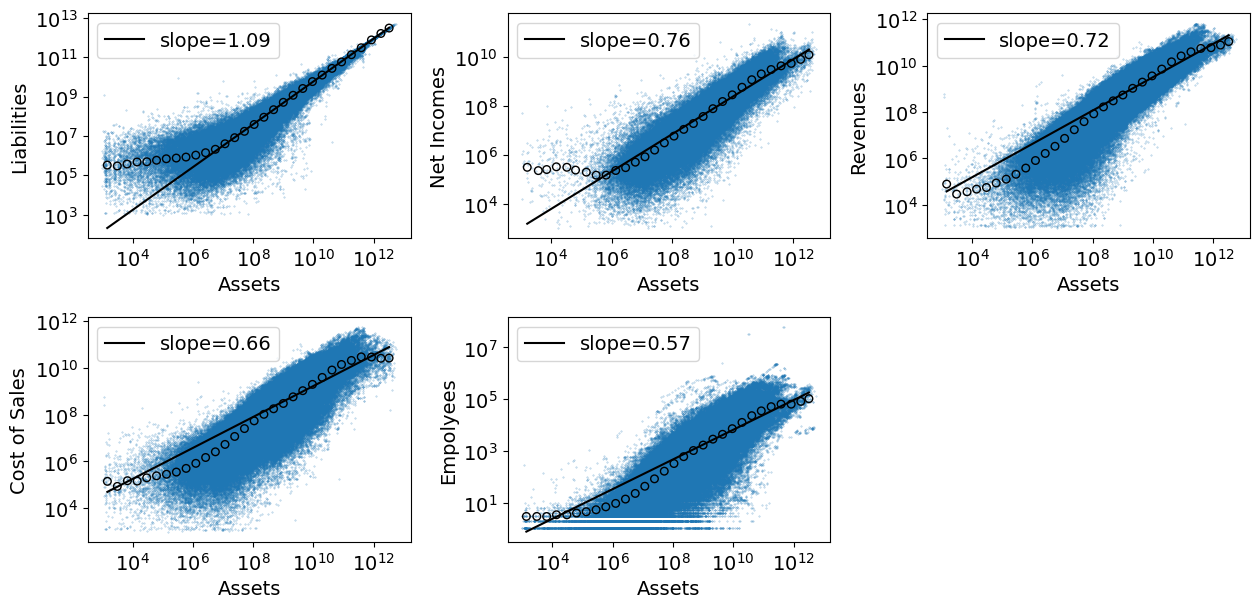

In [23]:
B = {}
C = {}

plt.figure(dpi=100, figsize=(15,7))
plt.subplots_adjust(hspace=0.35,wspace=0.3)
count = 0
fontsize = 14
for fea in ['lt','ni','revt','cost','emp']:

    plt.subplot(2,3,count+1)
    count += 1
#     fea = 'lt'
    xfea = 'at'
    b,c = scaling_law(xfea, fea, data_usa)
    B[fea] = b
    C[fea] = c
    b,c = scaling_law(xfea, fea, data_usa, is_bin=True)
#     B[fea] = b
#     C[fea] = c
plt.show()

In [25]:
B

{'lt': [0.9990301748969291, 0.9979976857774557, 1.0000626640164025],
 'ni': [0.8535530184504472, 0.8519136884073525, 0.8551923484935419],
 'revt': [0.9105719760509495, 0.9091064043931367, 0.9120375477087623],
 'cost': [0.8546951795081081, 0.8530861306958861, 0.8563042283203302],
 'emp': [0.7372580534941098, 0.7355396473771408, 0.7389764596110787]}

In [ ]:
# 'save parameters..'
# with open('./data/params_US.pkl', 'wb') as f:
#     params = pkl.dump({'B':B,'C':C})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


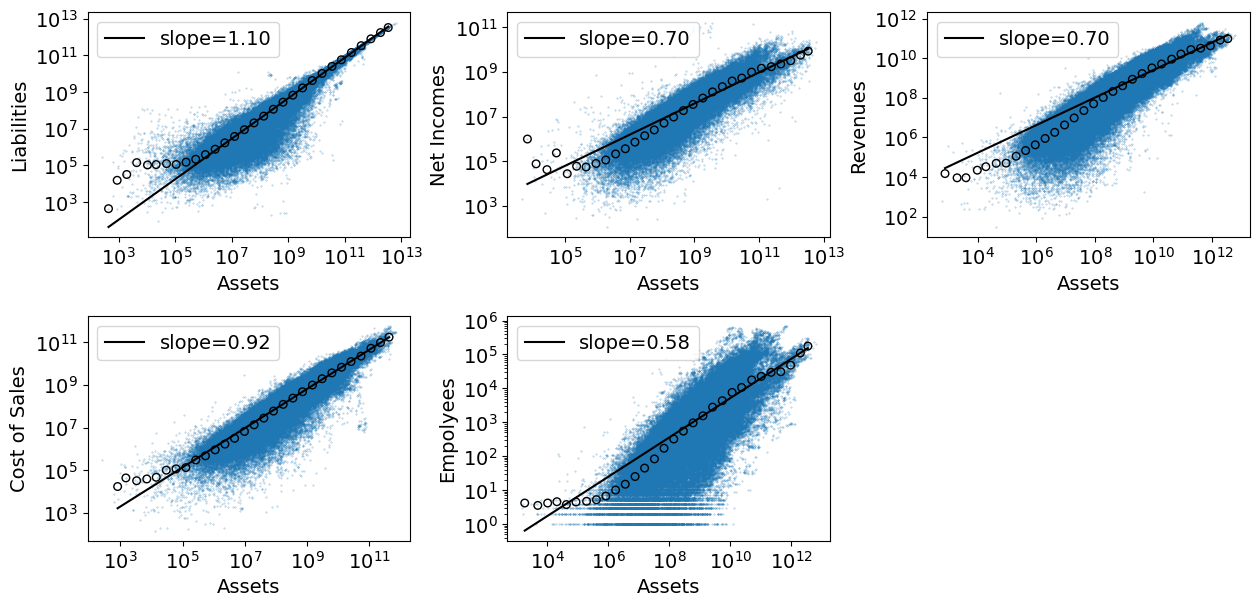

In [26]:
B = {}
C = {}

plt.figure(dpi=100, figsize=(15,7))
plt.subplots_adjust(hspace=0.35,wspace=0.3)
count = 0
fontsize = 14
for fea in ['lt','ni','revt','cost','emp']:

    plt.subplot(2,3,count+1)
    count += 1
#     fea = 'lt'
    xfea = 'at'
    b,c = scaling_law(xfea, fea, data_eur)
    B[fea] = b
    C[fea] = c
    b,c = scaling_law(xfea, fea, data_eur, is_bin=True)
#     B[fea] = b
#     C[fea] = c
plt.show()

In [27]:
B

{'lt': [1.0765610070392413, 1.0748924753015288, 1.0782295387769538],
 'ni': [0.8716073194242508, 0.8687198788010522, 0.8744947600474495],
 'revt': [0.9286182137621393, 0.9263141579149616, 0.9309222696093169],
 'cost': [0.964385297161242, 0.9623602206504891, 0.9664103736719949],
 'emp': [0.7227572570721597, 0.7196626358192476, 0.7258518783250717]}

In [ ]:
# 'save parameters..'
# with open('./data/params_EUR.pkl', 'wb') as f:
#     params = pkl.dump({'B':B,'C':C})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


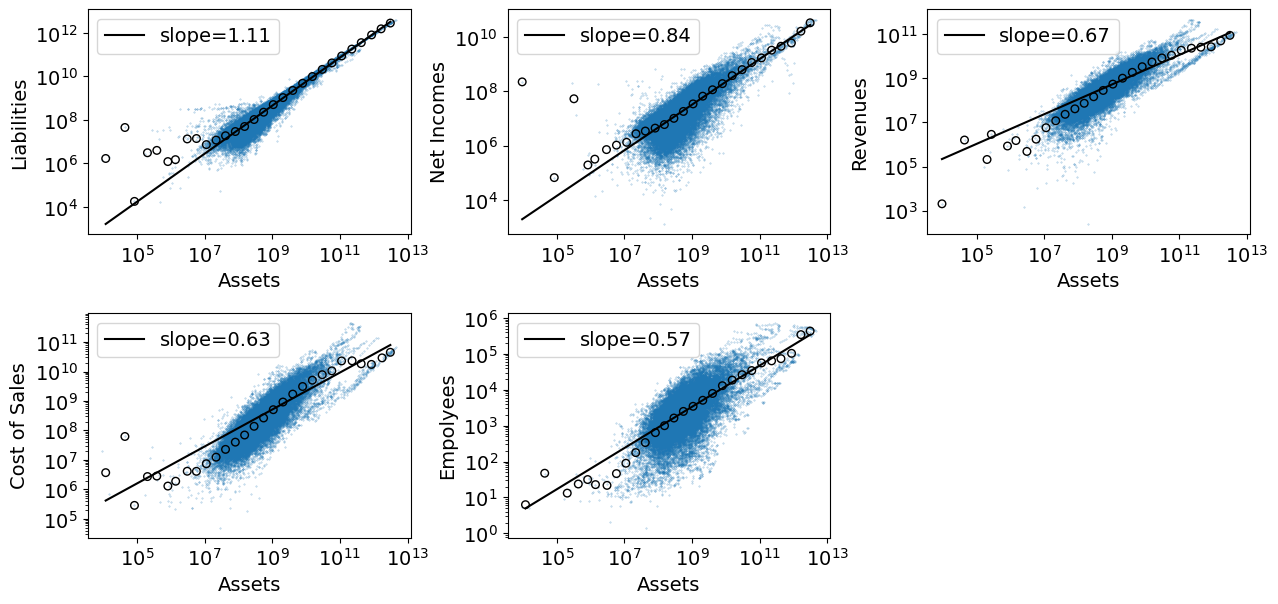

In [28]:
B = {}
C = {}

plt.figure(dpi=100, figsize=(15,7))
plt.subplots_adjust(hspace=0.35,wspace=0.3)
count = 0
fontsize = 14
for fea in ['lt','ni','revt','cost','emp']:

    plt.subplot(2,3,count+1)
    count += 1
#     fea = 'lt'
    xfea = 'at'
    b,c = scaling_law(xfea, fea, data_ch)
    B[fea] = b
    C[fea] = c
    b,c = scaling_law(xfea, fea, data_ch, is_bin=True)
#     B[fea] = b
#     C[fea] = c
plt.show()

In [29]:
B

{'lt': [1.0943270237091092, 1.0908410880670352, 1.0978129593511832],
 'ni': [0.8296357652517126, 0.8234342923452476, 0.8358372381581776],
 'revt': [0.916506208333426, 0.9118629363108248, 0.9211494803560272],
 'cost': [0.9059101929406663, 0.9013088580470243, 0.9105115278343083],
 'emp': [0.6359984190333914, 0.6296877370519822, 0.6423091010148005]}

In [ ]:
# 'save parameters..'
# with open('./data/params_ch.pkl', 'wb') as f:
#     params = pkl.dump({'B':B,'C':C})
